In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv("insurance.csv", sep=",")

Saving insurance.csv to insurance.csv


Comprension de datos

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df2 = df

In [ ]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-3-ee6eeca06fb0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df2.charges)


<Axes: xlabel='charges', ylabel='Density'>

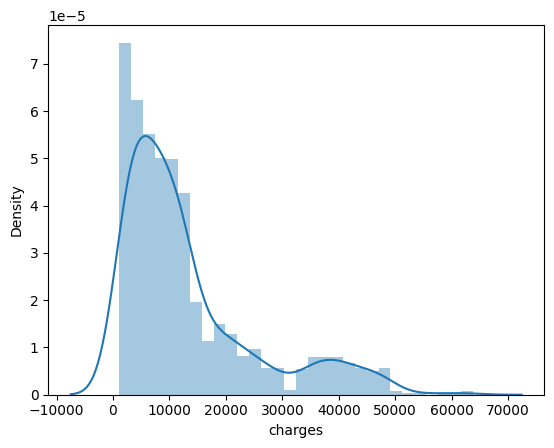

In [ ]:
sb.distplot(df2.charges)

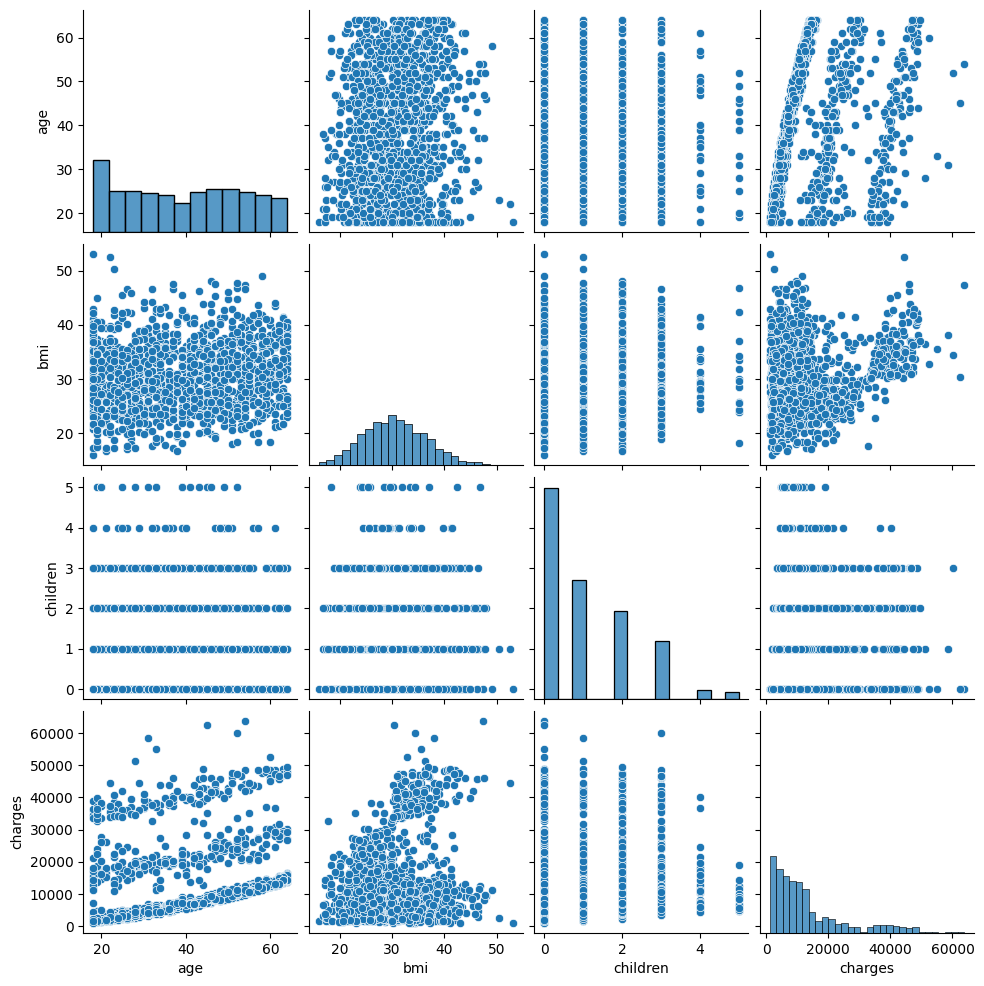

In [ ]:
sb.pairplot(df2)

<Axes: xlabel='bmi', ylabel='charges'>

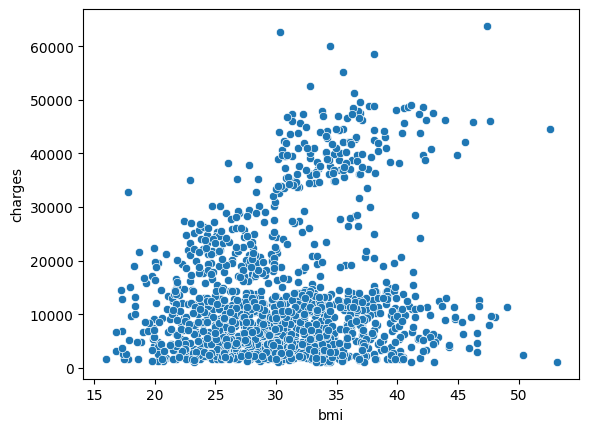

In [ ]:
sb.scatterplot(x=df2.bmi , y=df2.charges)

Preparacion de datos

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
df2.query('age==0 or bmi==0 or charges==0')

,age,sex,bmi,children,smoker,region,charges


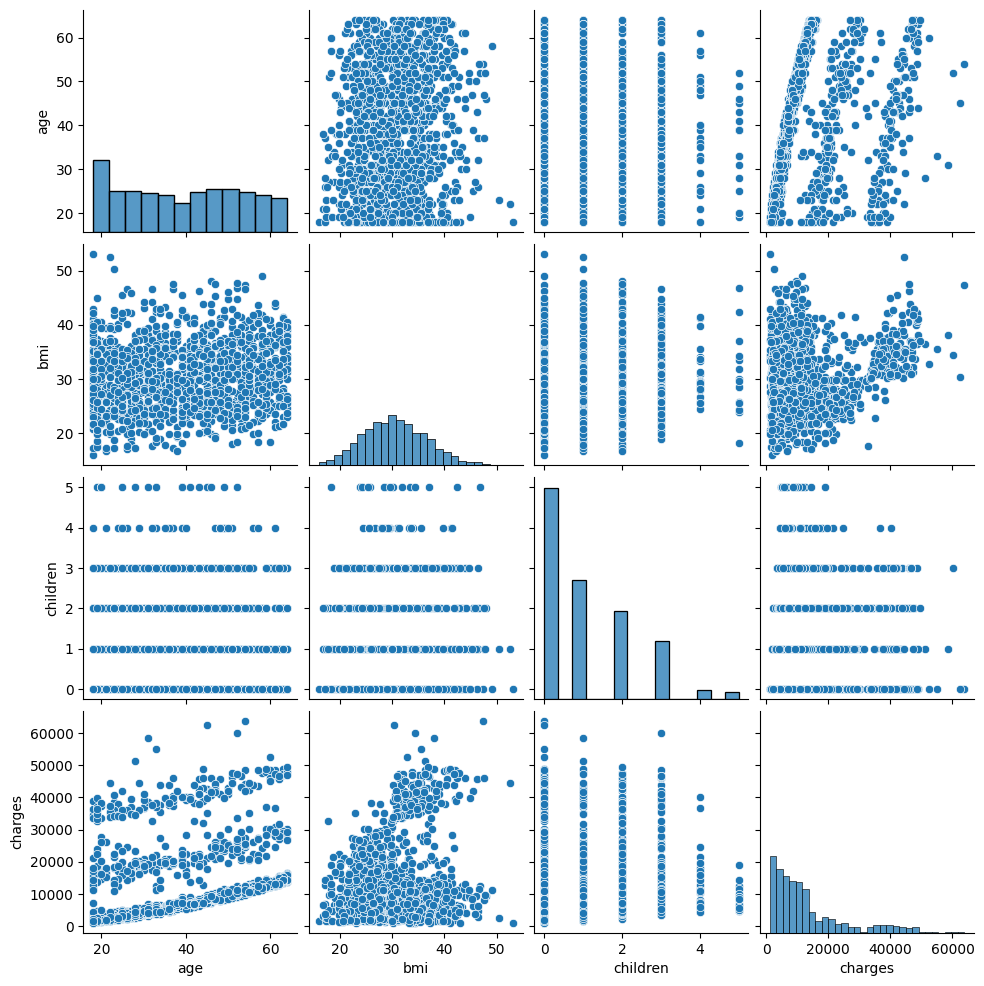

In [ ]:
df2.drop(df2.query('age==0 or bmi==0 or charges==0').index, inplace=True)
sb.pairplot(df2)

In [ ]:
df2.smoker.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df2.smoker.replace({"no":2, "yes":1}, inplace=True)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,2,southeast,1725.55230
2,28,male,33.000,3,2,southeast,4449.46200
3,33,male,22.705,0,2,northwest,21984.47061
4,32,male,28.880,0,2,northwest,3866.85520


In [ ]:
df2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df2.region.replace({'southwest':4, 'southeast':3, 'northwest':2, 'northeast':1}, inplace=True)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,4,16884.92400
1,18,male,33.770,1,2,3,1725.55230
2,28,male,33.000,3,2,3,4449.46200
3,33,male,22.705,0,2,2,21984.47061
4,32,male,28.880,0,2,2,3866.85520


In [ ]:
df2.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
df2.sex.replace({'female':2, 'male':1}, inplace=True)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,4,16884.92400
1,18,1,33.770,1,2,3,1725.55230
2,28,1,33.000,3,2,3,4449.46200
3,33,1,22.705,0,2,2,21984.47061
4,32,1,28.880,0,2,2,3866.85520


In [ ]:
X = df2.drop(["charges"], axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,4
1,18,1,33.770,1,2,3
2,28,1,33.000,3,2,3
3,33,1,22.705,0,2,2
4,32,1,28.880,0,2,2


In [ ]:
y = df2["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Modelamiento

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 74.55%
R squared of the Linear Regression on test set: 76.03%


<Axes: xlabel='charges'>

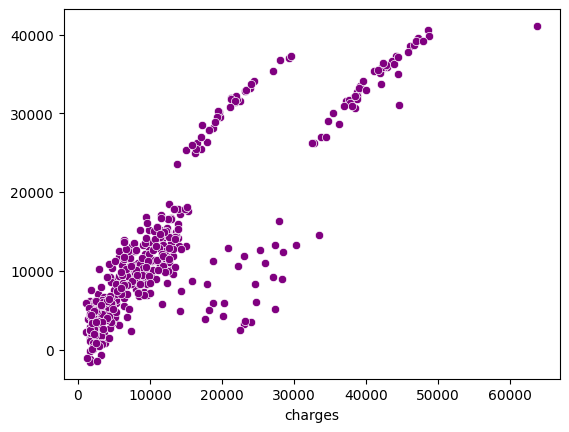

In [ ]:
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="purple")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 100.00%
R squared of the Decision Tree Regressor on test set: 71.77%


<Axes: xlabel='charges'>

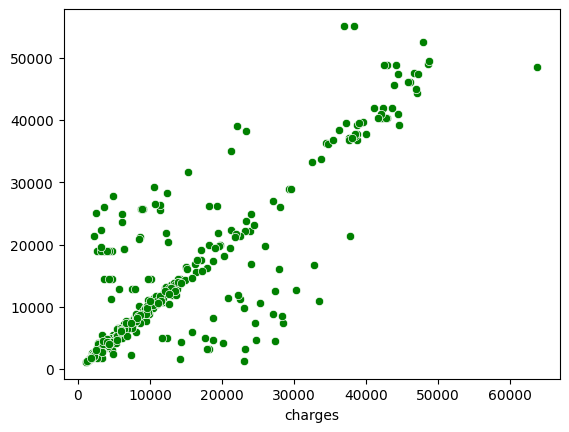

In [ ]:
y_pred1 = tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred1, color="green")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 97.61%
R squared of the Random Forest Regressor on test set: 84.60%


<Axes: xlabel='charges'>

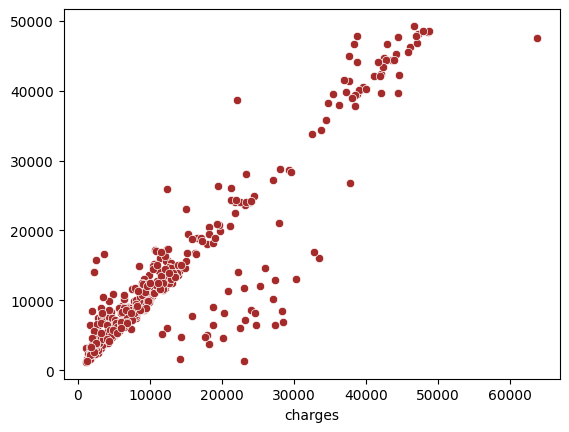

In [ ]:
y_pred2 = rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred2, color="brown")

Evaluacion de modelos

In [ ]:
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
764,9095.06825,8784.663103,-310.405147
887,5272.17580,7043.981950,1771.806150
890,29330.98315,37000.451569,7669.468419
1293,9301.89355,9449.574160,147.680610
259,33750.29180,27062.629305,-6687.662495
...,...,...,...
644,18806.14547,11269.626982,-7536.518488
602,11070.53500,10079.598118,-990.936882
731,10065.41300,8461.056486,-1604.356514
321,24671.66334,6081.197595,-18590.465745


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error of the Linear Regression on test set is 4204.42


In [ ]:
from sklearn.metrics import mean_squared_log_error
print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [ ]:
d = {"true": y_test, "predicted": y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["diff"] = df_dt["predicted"]-df_dt["true"]
df_dt


,true,predicted,diff
764,9095.06825,8604.48365,-490.58460
887,5272.17580,5373.36425,101.18845
890,29330.98315,28950.46920,-380.51395
1293,9301.89355,8605.36150,-696.53205
259,33750.29180,33732.68670,-17.60510
...,...,...,...
644,18806.14547,8116.26885,-10689.87662
602,11070.53500,10577.08700,-493.44800
731,10065.41300,10942.13205,876.71905
321,24671.66334,4618.07990,-20053.58344


In [ ]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Decision Tree Regressor on test set is 3090.50


In [ ]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred1)))

Mean Squared Log Error of the Decision Tree Regressor on test set is 28.83%


In [ ]:
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf

,true,predicted,diff
764,9095.06825,9852.856789,757.788539
887,5272.17580,5395.256714,123.080914
890,29330.98315,28674.813665,-656.169485
1293,9301.89355,9026.163988,-275.729562
259,33750.29180,34405.174635,654.882835
...,...,...,...
644,18806.14547,9009.224081,-9796.921389
602,11070.53500,12498.481828,1427.946828
731,10065.41300,12412.344789,2346.931789
321,24671.66334,6515.690675,-18155.972665


In [ ]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 2573.60


In [ ]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred2)))

Mean Squared Log Error of the Random Forest Regressor on test set is 20.23%


In [ ]:
model = rf
model

RandomForestRegressor(random_state=42)

Implementacion

In [ ]:
new_insurance = [20, 2, 33, 1, 2, 2]
new_insurance

[20, 2, 33, 1, 2, 2]

In [ ]:
prediction = model.predict([new_insurance])[0]
print("\033[1m The market price of this insurance is ${:.2f}".format(prediction))

 The market price of this insurance is $10386.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
f1 = open('fw_model1', 'wb')
pickle.dump(model , f1)
f1.close()
model.predict([[20, 2, 33, 1, 2, 2]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


10386.25040869999

Evaluacion N°3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Regresion lineal

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)


In [ ]:
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)


In [ ]:
print(f'Regresión Lineal Metrics:')
print(f'RMSE: {linear_rmse}')
print(f'MSE: {linear_mse}')
print(f'MAE: {linear_mae}')
print(f'R^2 Score: {linear_r2}')


Regresión Lineal Metrics:
RMSE: 5799.587091438357
MSE: 33635210.43117842
MAE: 4186.5088983664355
R^2 Score: 0.7833463107364538


Arbol de decision

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)


In [ ]:
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)


In [ ]:
print(f'\nÁrbol de Decisión Metrics:')
print(f'RMSE: {tree_rmse}')
print(f'MSE: {tree_mse}')
print(f'MAE: {tree_mae}')
print(f'R^2 Score: {tree_r2}')



Árbol de Decisión Metrics:
RMSE: 6910.625158256393
MSE: 47756740.07792619
MAE: 3111.726927597015
R^2 Score: 0.6923856342075376


Bosque aleatorio

In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)


In [ ]:
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_predictions))
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_mae = mean_absolute_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)


In [ ]:
print(f'\nBosques Aleatorios Metrics:')
print(f'RMSE: {forest_rmse}')
print(f'MSE: {forest_mse}')
print(f'MAE: {forest_mae}')
print(f'R^2 Score: {forest_r2}')



Bosques Aleatorios Metrics:
RMSE: 4632.40681709805
MSE: 21459192.919096485
MAE: 2490.422891415987
R^2 Score: 0.8617754057447253


KNN (k-nearest neighbor)

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)


In [ ]:
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)


In [ ]:
print(f'\nKNN Metrics:')
print(f'RMSE: {knn_rmse}')
print(f'MSE: {knn_mse}')
print(f'MAE: {knn_mae}')
print(f'R^2 Score: {knn_r2}')



KNN Metrics:
RMSE: 11512.15678107342
MSE: 132529753.75201473
MAE: 7929.952587638059
R^2 Score: 0.1463392165684949


SVM (Support vector machine)

In [ ]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


In [ ]:
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)


In [ ]:
print(f'\nSVM Metrics:')
print(f'RMSE: {svm_rmse}')
print(f'MSE: {svm_mse}')
print(f'MAE: {svm_mae}')
print(f'R^2 Score: {svm_r2}')



SVM Metrics:
RMSE: 12902.244323683266
MSE: 166467908.58801708
MAE: 8591.325419503186
R^2 Score: -0.07226582135930748
